In [173]:
# We load the data

import numpy as np

In [174]:
X = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')

In [175]:
# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [176]:
# We plot the data

import matplotlib.pyplot as plt

In [177]:
##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

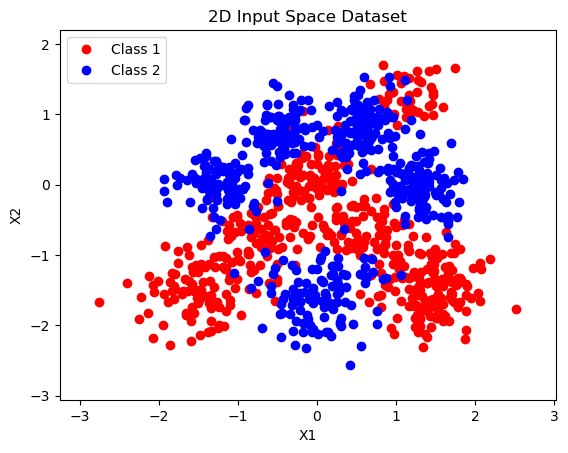

In [178]:
##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y, title):
    xx, yy = plot_data_internal(X, y)
    plt.title(title)
    plt.show()

plot_data(X, y, title='2D Input Space Dataset')

In [179]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [180]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))


In [181]:
##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


In [182]:
##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#
def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


In [183]:
##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#
def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)


In [184]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        gradient = X_tilde_train.T @ (y_train - sigmoid_value)

        w = w + alpha * gradient

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [207]:
# We train the classifier

alpha = 0.001
n_steps = 200

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.7894241077720173 -0.8061614626910125
-0.746091482608826 -0.7594970040350948
-0.7177822968754312 -0.7280510064204355
-0.6982292480633037 -0.705839877642328
-0.6840059346088623 -0.6894620957532674
-0.6731995601823474 -0.6769459393143977
-0.6647049063718576 -0.667109135494905
-0.6578573809313747 -0.659214508866546
-0.6522395906423551 -0.652782984095018
-0.6475768398266668 -0.647489683969454
-0.6436792183558463 -0.6431047140462897
-0.6404087759328391 -0.6394585983866412
-0.6376605609260779 -0.6364216644648749
-0.6353514889689547 -0.6338914981065729
-0.633413702826997 -0.6317851496350672
-0.631790532520014 -0.630034173465516
-0.6304339662686749 -0.6285813731893025
-0.6293029989287497 -0.6273785812587108
-0.628362489529729 -0.6263850723813988
-0.6275823153879622 -0.6255663713629472
-0.6269367022199819 -0.6248933134013741
-0.6264036635442324 -0.6243412732010447
-0.6259645136320912 -0.6238895139172207
-0.6256034355259835 -0.623520627131099
-0.6253070947968107 -0.6232200465203448
-0.62506429

In [201]:
w.shape

(3,)

In [186]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll, title):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title(title)
    plt.show()

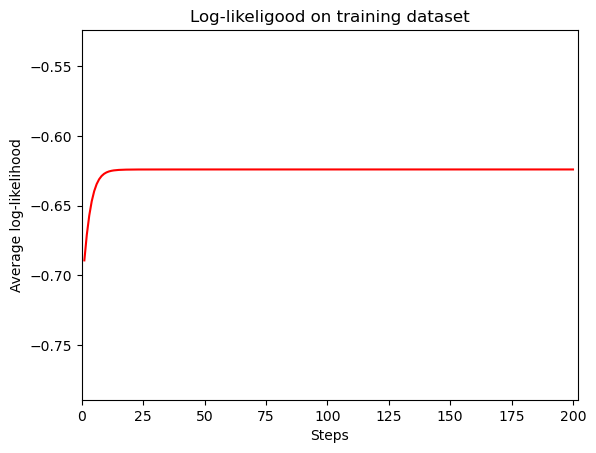

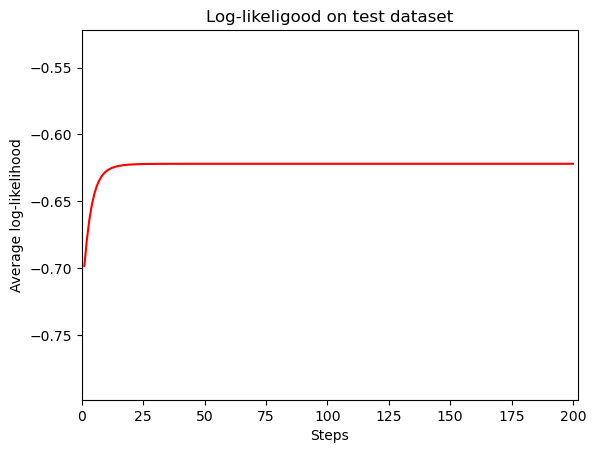

In [187]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on test dataset')

In [188]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, title, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title(title)
    plt.show()

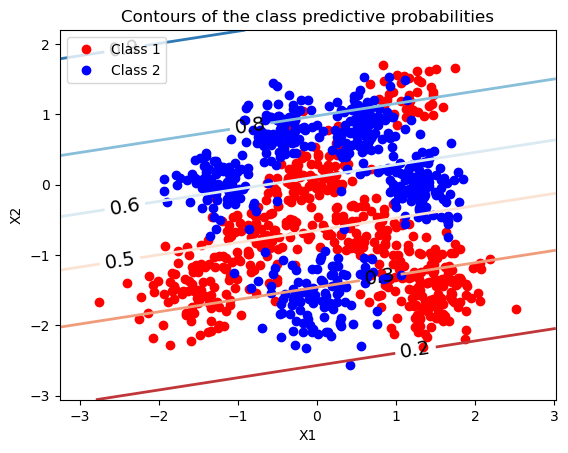

In [189]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, title='Contours of the class predictive probabilities')

In [190]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

In [191]:
X_tilde = get_x_tilde(X)
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.70750988, 0.29249012],
       [0.29149798, 0.70850202]])

In [192]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [217]:
# We expand the data

l = 1

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [211]:
X_tilde_train.shape

(800, 801)

In [218]:
# We train the new classifier on the feature expanded inputs

alpha = 0.0001
n_steps = 1000

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-1.5263709595928805 -1.4717872217932126
-1.449102653210565 -1.4063573012909074
-1.3892606561925178 -1.3563712409236461
-1.3404544934356044 -1.3158995125335793
-1.298739492954832 -1.281251575974248
-1.2617504803462654 -1.2502766297945378
-1.2281135330870165 -1.2217769127496276
-1.197035146901607 -1.1951004942506325
-1.168047019124309 -1.169894723338667
-1.1408593714645938 -1.1459663599088206
-1.1152804666425429 -1.1232052158284933
-1.091173402508078 -1.10154339795162
-1.0684328317651128 -1.0809336712035895
-1.0469720264418958 -1.061337840796334
-1.026715339918774 -1.0427204181138745
-1.007593643645247 -1.025045213739226
-0.9895415703647319 -1.0082736887007178
-0.9724959596904301 -0.9923644358672985
-0.9563951338339239 -0.9772733941484054
-0.9411787288722708 -0.9629545035814391
-0.9267878632883176 -0.949360575767576
-0.9131654745267623 -0.936444212056995
-0.9002567021159829 -0.9241586563135605
-0.8880092393778576 -0.9124585167007224
-0.8763736111801294 -0.9013003283514691
-0.865303361050

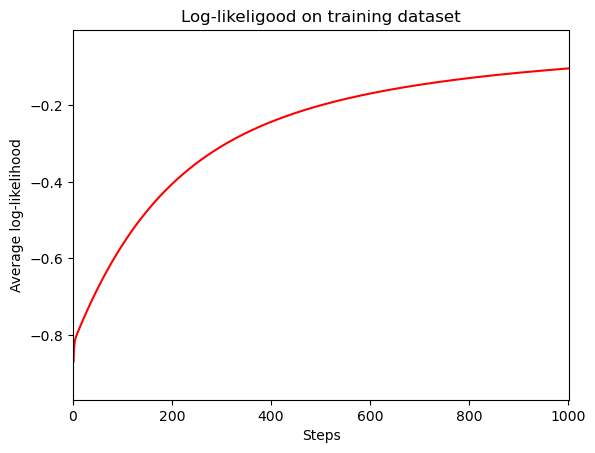

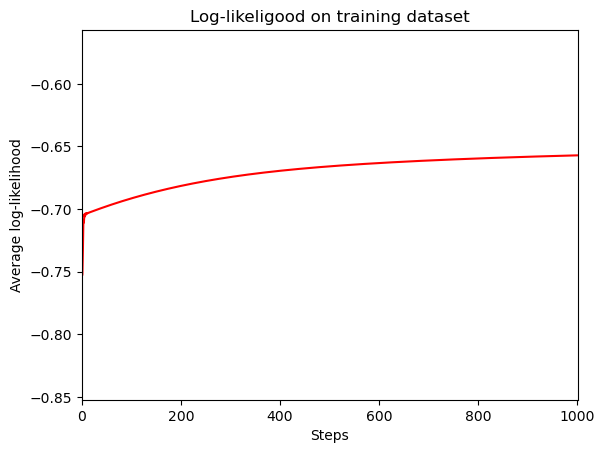

In [204]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on training dataset')

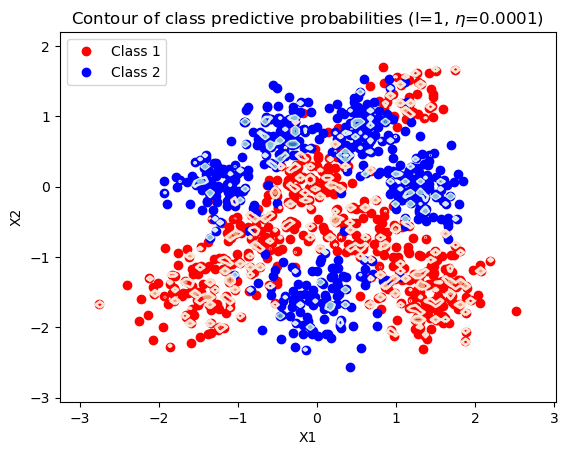

In [196]:
# We plot the predictive distribution

title = 'Contour of class predictive probabilities (l=1, $\eta$=0.0001)'
plot_predictive_distribution(X, y, w, title, lambda x : evaluate_basis_functions(l, x, X_train))

In [205]:
w.shape

(801,)

In [219]:
X_tilde = get_x_tilde(evaluate_basis_functions(l, X, X_train))
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.88735178, 0.11264822],
       [0.07894737, 0.92105263]])